# Analysis 3
## Lets try to analyze Car Theft in Chicago in Last 5 years

In [1]:
#Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
from collections import defaultdict
import os
%matplotlib inline

In [2]:
#Read the input file
df = pd.read_csv("../data/raw_data/Crimes_-_2001_to_present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5708019,HN516812,08/07/2007 05:00:00 PM,018XX W 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,CONSTRUCTION SITE,False,False,...,19.0,72.0,14,1165922.0,1836379.0,2007,04/15/2016 08:55:02 AM,41.706602,-87.668011,"(41.706601577, -87.668010676)"
1,5708022,HN515380,08/07/2007 09:00:00 PM,066XX S ELLIS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",False,False,...,5.0,42.0,18,1184028.0,1861290.0,2007,04/15/2016 08:55:02 AM,41.774557,-87.600931,"(41.77455706, -87.600931147)"
2,5708025,HN516837,08/03/2007 10:00:00 AM,054XX W WINDSOR AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,45.0,15.0,14,1139275.0,1929741.0,2007,04/15/2016 08:55:02 AM,41.963325,-87.763324,"(41.963324609, -87.763324045)"
3,5708028,HN516787,08/03/2007 04:30:00 PM,001XX N STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,False,False,...,42.0,32.0,06,1176336.0,1901448.0,2007,04/15/2016 08:55:02 AM,41.884930,-87.627920,"(41.884930201, -87.627919724)"
4,5708029,HN495945,07/29/2007 10:02:00 AM,078XX S BENNETT AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,VEHICLE NON-COMMERCIAL,True,False,...,8.0,43.0,18,1190231.0,1853330.0,2007,04/15/2016 08:55:02 AM,41.752567,-87.578448,"(41.752566947, -87.578448404)"


In [3]:
#Limiting the data for last 5 years
df = df[df['Year'] > 2011]

## Community Areas
Chicago can be divided into a number of distinct regions. Each Community Area has a name a number. This dataset has just got the numbers. Since names carry greater semantic meaning, therefore, we'll add another column so we can call areas by their names.

In [4]:
#Lets add this extra column. Data is obtained from https://en.wikipedia.org/wiki/Community_areas_in_Chicago
areas = {
"1.0": "Rogers Park",
"2.0": "West Ridge",
"3.0": "Uptown",
"4.0": "Lincoln Square",
"5.0": "North Center",
"6.0": "Lakeview",
"7.0": "Lincoln Park",
"8.0": "Near North Side",
"9.0": "Edison Park",
"10.0": "Norwood Park",
"11.0": "Jefferson Park",
"12.0": "Forest Glen",
"13.0": "North Park",
"14.0": "Albany Park",
"15.0": "Portage Park",
"16.0": "Irving Park",
"17.0": "Dunning",
"18.0": "Montclare",
"19.0": "Belmont Cragin",
"20.0": "Hermosa",
"21.0": "Avondale",
"22.0": "Logan Square",
"23.0": "Humboldt Park",
"24.0": "West Town",
"25.0": "Austin",
"26.0": "West Garfield Park",
"27.0": "East Garfield Park",
"28.0": "Near West Side",
"29.0": "North Lawndale",
"30.0": "South Lawndale",
"31.0": "Lower West Side",
"32.0": "Loop",
"33.0": "Near South Side",
"34.0": "Armour Square",
"35.0": "Douglas",
"36.0": "Oakland",
"37.0": "Fuller Park",
"38.0": "Grand Boulevard",
"39.0": "Kenwood",
"40.0": "Washington Park",
"41.0": "Hyde Park",
"42.0": "Woodlawn",
"43.0": "South Shore",
"44.0": "Chatham",
"45.0": "Avalon Park",
"46.0": "South Chicago",
"47.0": "Burnside",
"48.0": "Calumet Heights",
"49.0": "Roseland",
"50.0": "Pullman",
"51.0": "South Deering",
"52.0": "East Side",
"53.0": "West Pullman",
"54.0": "Riverdale",
"55.0": "Hegewisch",
"56.0": "Garfield Ridge",
"57.0": "Archer Heights",
"58.0": "Brighton Park",
"59.0": "McKinley Park",
"60.0": "Bridgeport",
"61.0": "New City",
"62.0": "West Elsdon",
"63.0": "Gage Park",
"64.0": "Clearing",
"65.0": "West Lawn",
"66.0": "Chicago Lawn",
"67.0": "West Englewood",
"68.0": "Englewood",
"69.0": "Greater Grand Crossing",
"70.0": "Ashburn",
"71.0": "Auburn Gresham",
"72.0": "Beverly",
"73.0": "Washington Heights",
"74.0": "Mount Greenwood",
"75.0": "Morgan Park",
"76.0": "O'Hare",
"77.0": "Edgewater"
}

In [5]:
df['Community Area'] = df['Community Area'].astype(str)
df['Area Name'] = df['Community Area'].map(areas)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Area Name
389,10513657,HZ255291,05/07/2016 04:32:00 PM,048XX N LINCOLN AVE,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,DRUG STORE,False,False,...,4.0,04A,1159566.0,1931867.0,2016,05/14/2016 03:53:39 PM,41.968764,-87.688662,"(41.968763818, -87.688661831)",Lincoln Square
672,10513658,HZ255272,05/07/2016 03:45:00 PM,062XX S GREENWOOD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,42.0,08B,1184403.0,1863924.0,2016,05/14/2016 03:53:39 PM,41.781776,-87.599474,"(41.781776219, -87.599474074)",Woodlawn
891,10513659,HZ255304,05/07/2016 04:00:00 PM,022XX E 71ST ST,0330,ROBBERY,AGGRAVATED,SIDEWALK,False,False,...,43.0,03,1192475.0,1858295.0,2016,05/14/2016 03:53:39 PM,41.766137,-87.570064,"(41.76613698, -87.570063796)",South Shore
1434,10513661,HZ255297,05/07/2016 04:00:00 PM,014XX S HOMAN AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,29.0,18,1153934.0,1892850.0,2016,05/14/2016 03:53:39 PM,41.861812,-87.710413,"(41.86181223, -87.710412608)",North Lawndale
1565,10513662,HZ255199,05/07/2016 03:00:00 PM,002XX W 60TH PL,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,68.0,08A,1175473.0,1864847.0,2016,05/14/2016 03:53:39 PM,41.784514,-87.632186,"(41.784513502, -87.63218583)",Englewood


In [6]:
#Limit the data for Car Theft
cars = df[df['Primary Type']=='MOTOR VEHICLE THEFT'].copy()
cars['Date2'] = cars['Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))
cars['Updated2'] = cars['Updated On'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

cars = cars.drop(['Date','Updated On'], axis = 1)
cars.rename(columns = {'Date2':'Date','Updated2':'Updated On'},inplace = True)
cars.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Area Name,Date,Updated On
38438,10513923,HZ255738,007XX N LARRABEE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,DRIVEWAY - RESIDENTIAL,False,False,1831,...,07,1172212.0,1905183.0,2016,41.895271,-87.642953,"(41.895271296, -87.642953212)",Near North Side,2016-05-07 10:45:00,2016-05-14 03:53:39
47673,10514060,HZ255900,073XX N SHERIDAN RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2423,...,07,1166025.0,1948611.0,2016,42.014574,-87.664431,"(42.014573954, -87.664431457)",Rogers Park,2016-05-07 11:00:00,2016-05-14 03:53:39
52046,10514173,HZ256028,063XX W MELROSE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1633,...,07,1133553.0,1920933.0,2016,41.939257,-87.784570,"(41.939257053, -87.784569593)",Dunning,2016-05-07 03:00:00,2016-05-14 03:53:39
52090,10514174,HZ255910,022XX N KEELER AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2525,...,07,1148018.0,1914485.0,2016,41.921297,-87.731572,"(41.921296759, -87.731572463)",Hermosa,2016-05-07 11:00:00,2016-05-14 03:53:39
52828,10514175,HZ256007,029XX N MOBILE AVE,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE W-VIN",RESIDENTIAL YARD (FRONT/BACK),False,False,2511,...,07,1133902.0,1918806.0,2016,41.933414,-87.783337,"(41.933414189, -87.783337051)",Belmont Cragin,2016-05-07 11:00:00,2016-05-14 03:53:39


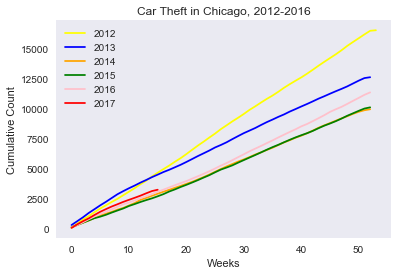

In [7]:
#Lets plot Car Theft in Chicago for last 5 years
bins = cars[['Description', 'Year', 'Date']].copy()
title = 'Car Theft in Chicago, 2012-2016'
colors = ['yellow','blue','orange','green','pink','red']
i = 0
years = bins.groupby('Year')
for a, b in years:
    b.index = b.Date
    aYear = b.resample('W').count()
    aYear.index = range(aYear.shape[0])
    plt.plot(aYear.Description.cumsum(), color=colors[i], label = a)
    i += 1
plt.grid()
plt.legend(loc = 'upper left')
plt.title(title)
plt.xlabel('Weeks')
plt.ylabel('Cumulative Count')
if not os.path.exists('ana_3'):
    os.makedirs('ana_3')
plt.savefig('ana_3/Car Theft in Chicago, 2012-2017')

In [8]:
#Function to sort
def sort_top_ten(group):
    year_area = defaultdict(int)
    for a, b in group:
        year_area[a] = b.shape[0]

    counts = set(year_area.values())
    count_by_year_area = defaultdict(list)
    for c in counts:
        for a, b in year_area.items():
            if b == c:
                count_by_year_area[c].append(a)

    print ("COUNT YEAR  COMMUNITY AREA")
    for c in sorted(counts, reverse=True)[:10]:
        for item in count_by_year_area[c]:
            print ("{:5} {:4}  {:25}".format(c, item[0], item[1]))

In [9]:
cars_area_by_year_group = cars.groupby(['Year', 'Area Name'])
sort_top_ten(cars_area_by_year_group)

COUNT YEAR  COMMUNITY AREA
  826 2012  Austin                   
  787 2016  Austin                   
  656 2015  Austin                   
  640 2014  Austin                   
  640 2012  West Town                
  633 2013  Austin                   
  625 2012  Logan Square             
  623 2012  Humboldt Park            
  527 2013  West Town                
  523 2012  Near West Side           
  492 2012  Belmont Cragin           


In [12]:
#Display top 20 Worst places to park a Car in Chicago based on Community Area
cars_area_by_year_group = cars.groupby(['Area Name']).size().to_frame().reset_index().rename(columns={0:"Count"}).sort_values('Count', ascending=False)
if not os.path.exists('ana_3'):
    os.makedirs('ana_3')
cars_area_by_year_group.to_csv('ana_3/Count of Car Theft by Community Area.csv')
cars_area_by_year_group.head(20)

,Area Name,Count
5,Austin,3750
75,West Town,2391
32,Humboldt Park,2151
49,Near West Side,2032
40,Logan Square,1969
8,Belmont Cragin,1805
65,South Shore,1676
4,Auburn Gresham,1616
15,Chicago Lawn,1559
52,North Lawndale,1494


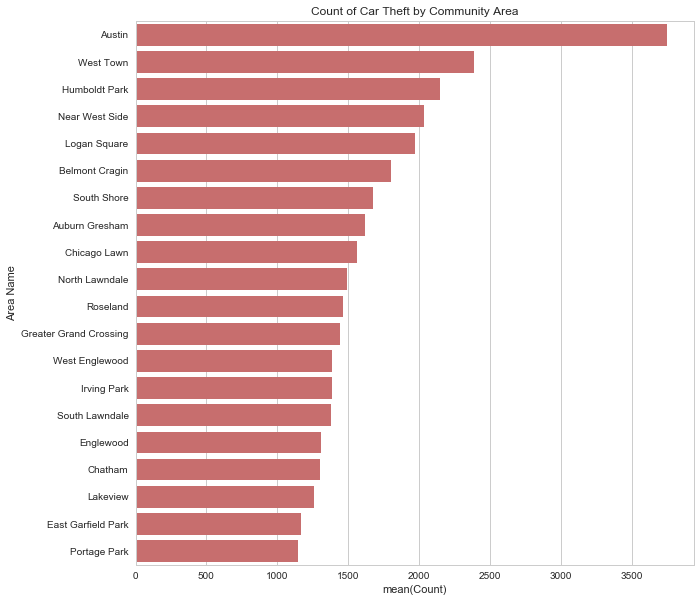

In [13]:
#Lets try to plot this inference to a plot
fig,ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x ="Count", y = "Area Name", data = cars_area_by_year_group[:20],ax = ax, color='r')
ax.set_title("Count of Car Theft by Community Area")
ax
if not os.path.exists('ana_3'):
    os.makedirs('ana_3')
plt.savefig('ana_3/Count of Car Theft by Community Area')

### Inference
- The rate of Car theft was observed maximum in the year 2012.
- The rate of car theft seems to be falling in Chicago, since 2012.
- We can see that out of the 77 Community Areas, Austin is the worst Community Are to park a car, followed by West Town and Humboldt Park.